In [1]:
import numpy as np
import pandas as pd
from keras.layers import TextVectorization
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from lazypredict.Supervised import LazyClassifier


In [2]:

my_stop_words = text.ENGLISH_STOP_WORDS.union(["like", "knew", "ll", "we", "ve", "think", "things", "don", "feel", "think", "just", "really", "want", "going", "need", "https", "time", "life", "help", "people", "person", "got", "right", "having", "getting", "does", "didn", "lot", "said", "saying", "do", "make", "getting", "doing", "try", "way", "did", "day", "days", "mental", "health", "im", "feel", "feeling", "felt", "ago", "actually", "doesn", "wouldn", "x200b"])

In [3]:
my_stop_words = list(my_stop_words)

In [4]:
df = pd.read_csv('Mental-health-related-subreddits.csv')  

In [5]:
df = df[df['Subreddit'].notna()]

In [5]:
df['Subreddit'].describe()

count         488469
unique             7
top       depression
freq          258496
Name: Subreddit, dtype: object

In [6]:
df['Subreddit'].unique()

array(['Anxiety', 'BPD', 'depression', 'autism', 'mentalhealth',
       'bipolar', 'schizophrenia'], dtype=object)

In [7]:
df.groupby('Subreddit')['Text'].nunique()

Subreddit
Anxiety           85928
BPD               38089
autism             7123
bipolar           40987
depression       257503
mentalhealth      39160
schizophrenia     17469
Name: Text, dtype: int64

In [7]:
df

,Title,Text,Subreddit
0,exposure does not work!,I have struggled with social anxiety from chil...,Anxiety
1,Panic attack? derealization? can't go to docto...,"Back in March (I know, a while ago D:), I woke...",Anxiety
2,How long can a panic attack last?!,I've been withdrawing from medicines lately (e...,Anxiety
3,Stepping stones,"First time poster, long time lurker. \n\nI've ...",Anxiety
4,"Coping with anxiety over climate change, on th...","Hi all,\n\nI made a throwaway account as my ma...",Anxiety
...,...,...,...
488467,Religion and paranoid conversation,Ok! I've got a rant to make and a conversation...,schizophrenia
488468,Isn't this a little weird for being tardive dy...,"When I wake up, I rarely have any tics in my t...",schizophrenia
488469,Is this a symptom of schizophrenia or somethin...,I’m not sure if this is schizophrenia (or perh...,schizophrenia
488470,Anyone seen the new Black Mirror episode Bande...,Although I don't think it was stated what Stef...,schizophrenia


In [8]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
print(type(tokenizer.backend_tokenizer))

<class 'tokenizers.Tokenizer'>


In [9]:
df["text_cleaned"] = df["Text"]#.apply(tokenizer.backend_tokenizer.normalizer.normalize_str)

In [10]:
df

,Title,Text,Subreddit,text_cleaned
0,exposure does not work!,I have struggled with social anxiety from chil...,Anxiety,I have struggled with social anxiety from chil...
1,Panic attack? derealization? can't go to docto...,"Back in March (I know, a while ago D:), I woke...",Anxiety,"Back in March (I know, a while ago D:), I woke..."
2,How long can a panic attack last?!,I've been withdrawing from medicines lately (e...,Anxiety,I've been withdrawing from medicines lately (e...
3,Stepping stones,"First time poster, long time lurker. \n\nI've ...",Anxiety,"First time poster, long time lurker. \n\nI've ..."
4,"Coping with anxiety over climate change, on th...","Hi all,\n\nI made a throwaway account as my ma...",Anxiety,"Hi all,\n\nI made a throwaway account as my ma..."
...,...,...,...,...
488467,Religion and paranoid conversation,Ok! I've got a rant to make and a conversation...,schizophrenia,Ok! I've got a rant to make and a conversation...
488468,Isn't this a little weird for being tardive dy...,"When I wake up, I rarely have any tics in my t...",schizophrenia,"When I wake up, I rarely have any tics in my t..."
488469,Is this a symptom of schizophrenia or somethin...,I’m not sure if this is schizophrenia (or perh...,schizophrenia,I’m not sure if this is schizophrenia (or perh...
488470,Anyone seen the new Black Mirror episode Bande...,Although I don't think it was stated what Stef...,schizophrenia,Although I don't think it was stated what Stef...


In [11]:
#df["text_cleaned"] = df["text_cleaned"].str.replace('[^a-zA-Z ]', '')

In [12]:
df

,Title,Text,Subreddit,text_cleaned
0,exposure does not work!,I have struggled with social anxiety from chil...,Anxiety,I have struggled with social anxiety from chil...
1,Panic attack? derealization? can't go to docto...,"Back in March (I know, a while ago D:), I woke...",Anxiety,"Back in March (I know, a while ago D:), I woke..."
2,How long can a panic attack last?!,I've been withdrawing from medicines lately (e...,Anxiety,I've been withdrawing from medicines lately (e...
3,Stepping stones,"First time poster, long time lurker. \n\nI've ...",Anxiety,"First time poster, long time lurker. \n\nI've ..."
4,"Coping with anxiety over climate change, on th...","Hi all,\n\nI made a throwaway account as my ma...",Anxiety,"Hi all,\n\nI made a throwaway account as my ma..."
...,...,...,...,...
488467,Religion and paranoid conversation,Ok! I've got a rant to make and a conversation...,schizophrenia,Ok! I've got a rant to make and a conversation...
488468,Isn't this a little weird for being tardive dy...,"When I wake up, I rarely have any tics in my t...",schizophrenia,"When I wake up, I rarely have any tics in my t..."
488469,Is this a symptom of schizophrenia or somethin...,I’m not sure if this is schizophrenia (or perh...,schizophrenia,I’m not sure if this is schizophrenia (or perh...
488470,Anyone seen the new Black Mirror episode Bande...,Although I don't think it was stated what Stef...,schizophrenia,Although I don't think it was stated what Stef...


In [13]:
text_df = df[["Subreddit", "text_cleaned"]]

In [14]:
anx_df = text_df.loc[df['Subreddit'] == "Anxiety"]

In [15]:
anx_df_text = anx_df["text_cleaned"].to_numpy()
anx_df_text

array(["I have struggled with social anxiety from childhood and the main advice from friends, self-help books and professionals is to expose myself to those environments but I'm not better off!\n\nExample: I get anxious every single time I go into a shop even though I have been doing my own shopping daily/ weekly since being 16.\n\nI get nervous, sweaty, heart pounding every time I go into the gym, yet I have been working out at the same gym for years.\n\nHas exposure not worked for anyone else?",
       'Back in March (I know, a while ago D:), I woke up that day to go to school but I was feeling kind of \'off\' I felt depressed, I didn\'t really feel like getting up or even seeing anyone. I have a history of this :P \n// It\'s really on and off but it mainly happens in the winter time. I get highly anxious also going out anywhere during these periods of time, I get suspicious and paranoid of everyone or anything. I usually end up isolating myself in my room until it\'s all over and ea

In [227]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.feature_extraction import text
my_stop_words = text.ENGLISH_STOP_WORDS.union(["like", "knew", "ll", "we", "ve", "think", "things", "don", "feel", "think", "just", "really", "want", "going", "need", "https", "time", "life", "help", "people", "person", "got", "right", "having", "getting", "does", "didn", "lot", "said", "saying", "do", "make", "getting", "doing", "try", "way", "did", "day", "days", "mental", "health", "im", "feel", "feeling", "felt", "ago", "actually", "doesn", "wouldn", "x200b"])

In [228]:
vectorizer = TfidfVectorizer(min_df=3, max_df=0.3, max_features=300, strip_accents="unicode", stop_words=my_stop_words)
vectors = vectorizer.fit_transform(anx_df_text)
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
anx_df_text_tfidf = pd.DataFrame(denselist, columns=feature_names)

In [229]:
anx_df_text_tfidf

,10,20,able,advice,afraid,amp,anxious,anymore,appointment,ask,...,world,worried,worry,worrying,worse,worst,wrong,year,years,yesterday
0,0.0,0.0,0.000000,0.267563,0.000000,0.000000,0.217303,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.219940,0.000000
1,0.0,0.0,0.000000,0.061442,0.000000,0.000000,0.099801,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.151518,0.000000
2,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.232948
3,0.0,0.0,0.102338,0.000000,0.000000,0.000000,0.084269,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.094741,0.085291,0.000000
4,0.0,0.0,0.081610,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.214358,0.0,0.0,0.0,0.0,0.0,0.0,0.151103,0.068016,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86238,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
86239,0.0,0.0,0.000000,0.109630,0.126386,0.000000,0.000000,0.0,0.0,0.000000,...,0.142006,0.0,0.0,0.0,0.0,0.0,0.0,0.300302,0.090117,0.000000
86240,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.181485,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
86241,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [230]:
anx_sum = anx_df_text_tfidf.sum()


In [231]:
anx_sum = anx_sum.sort_values(ascending=False)
anx_sum


work       3398.831717
anxious    3151.092089
panic      3116.340873
bad        2726.154859
job        2574.891135
              ...     
fast        577.148910
dad         573.763595
ended       549.025877
gave        531.232341
story       521.501764
Length: 300, dtype: float64

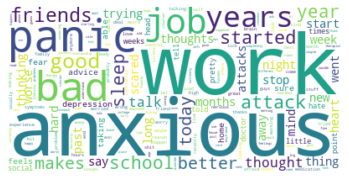

In [232]:
anx_dict=anx_sum.to_dict()

# create the WordCloud object
wordcloud = WordCloud(min_word_length =4,
                      background_color='white')

# generate the word cloud
wordcloud.generate_from_frequencies(anx_dict)

#plot
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [233]:
BPD_df = df.loc[df['Subreddit'] == "BPD"]
vectorizer = TfidfVectorizer(min_df=3, max_df=0.3, max_features=300, strip_accents="unicode", stop_words=my_stop_words)
vectors = vectorizer.fit_transform(BPD_df["Text"])
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
BPD_df_text_tfidf = pd.DataFrame(denselist, columns=feature_names)
BPD_sum = BPD_df_text_tfidf.sum()
BPD_sum = BPD_sum.sort_values(ascending=False)
BPD_sum

love            1337.312658
friends         1218.197074
good            1173.400375
work            1097.855378
relationship    1093.947944
                   ...     
abuse            241.606395
spent            240.743899
dad              236.731446
moved            231.491104
kept             217.503160
Length: 300, dtype: float64

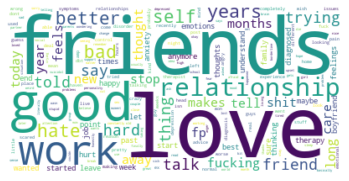

In [234]:
BPD_dict=BPD_sum.to_dict()

# create the WordCloud object
wordcloud = WordCloud(min_word_length =4,
                      background_color='white')

# generate the word cloud
wordcloud.generate_from_frequencies(BPD_dict)

#plot
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [235]:
autism_df = df.loc[df['Subreddit'] == "autism"]
vectorizer = TfidfVectorizer(min_df=3, max_df=0.3, max_features=300, strip_accents="unicode", stop_words=my_stop_words)
vectors = vectorizer.fit_transform(autism_df["Text"])
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
autism_df_text_tfidf = pd.DataFrame(denselist, columns=feature_names)
autism_sum = autism_df_text_tfidf.sum()
autism_sum = autism_sum.sort_values(ascending=False)
autism_sum

autistic    354.783479
school      242.391258
son         206.687256
spectrum    206.191423
year        198.939046
               ...    
stay         45.385929
fine         45.324570
teachers     45.022022
learned      45.012657
money        43.672840
Length: 300, dtype: float64

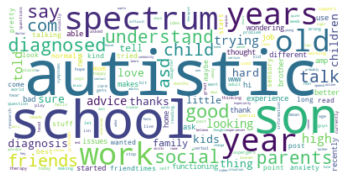

In [236]:
autism_dict=autism_sum.to_dict()

# create the WordCloud object
wordcloud = WordCloud(min_word_length =4,
                      background_color='white')

# generate the word cloud
wordcloud.generate_from_frequencies(autism_dict)

#plot
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [237]:
bipolar_df = df.loc[df['Subreddit'] == "bipolar"]
vectorizer = TfidfVectorizer(min_df=3, max_df=0.3, max_features=300, strip_accents="unicode", stop_words=my_stop_words)
vectors = vectorizer.fit_transform(bipolar_df["Text"])
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
bipolar_df_text_tfidf = pd.DataFrame(denselist, columns=feature_names)
bipolar_sum = bipolar_df_text_tfidf.sum()
bipolar_sum = bipolar_sum.sort_values(ascending=False)
bipolar_sum

bipolar       2131.290898
manic         1337.240539
work          1319.039630
meds          1313.365805
depression    1200.149290
                 ...     
course         251.203077
gave           246.440365
phone          240.917416
story          238.738777
dad            232.094839
Length: 300, dtype: float64

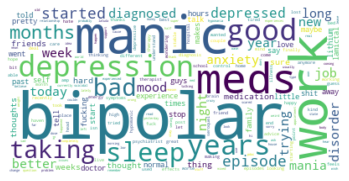

In [238]:
bipolar_dict=bipolar_sum.to_dict()

# create the WordCloud object
wordcloud = WordCloud(min_word_length =4,
                      background_color='white')

# generate the word cloud
wordcloud.generate_from_frequencies(bipolar_dict)

#plot
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [239]:
depression_df = df.loc[df['Subreddit'] == "depression"]
vectorizer = TfidfVectorizer(min_df=3, max_df=0.3, max_features=300, strip_accents="unicode", stop_words=my_stop_words)
vectors = vectorizer.fit_transform(depression_df["Text"])
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
depression_df_text_tfidf = pd.DataFrame(denselist, columns=feature_names)
depression_sum = depression_df_text_tfidf.sum()
depression_sum = depression_sum.sort_values(ascending=False)
depression_sum

depression    12814.904965
friends       11070.008545
years          8966.432724
good           8563.220784
work           8336.310110
                  ...     
brother        1499.837116
gave           1481.719066
kids           1479.954470
father         1468.385716
sister         1329.403161
Length: 300, dtype: float64

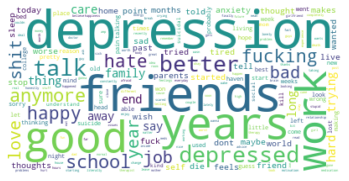

In [240]:
depression_dict=depression_sum.to_dict()

# create the WordCloud object
wordcloud = WordCloud(min_word_length =4,
                      background_color='white')

# generate the word cloud
wordcloud.generate_from_frequencies(depression_dict)

#plot
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [241]:
mentalhealth_df = df.loc[df['Subreddit'] == "mentalhealth"]
vectorizer = TfidfVectorizer(min_df=3, max_df=0.3, max_features=300, strip_accents="unicode", stop_words=my_stop_words)
vectors = vectorizer.fit_transform(mentalhealth_df["Text"])
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
mentalhealth_df_text_tfidf = pd.DataFrame(denselist, columns=feature_names)
mentalhealth_sum = mentalhealth_df_text_tfidf.sum()
mentalhealth_sum = mentalhealth_sum.sort_values(ascending=False)
mentalhealth_sum

anxiety       1637.046803
depression    1492.759388
years         1444.927983
work          1302.015539
friends       1254.684852
                 ...     
course         275.336458
ended          264.918405
moved          261.164657
eventually     245.445722
kept           238.934473
Length: 300, dtype: float64

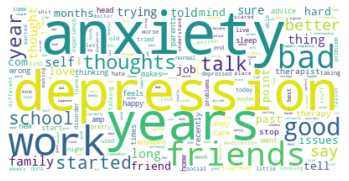

In [242]:
mentalhealth_dict=mentalhealth_sum.to_dict()

# create the WordCloud object
wordcloud = WordCloud(min_word_length =4,
                      background_color='white')

# generate the word cloud
wordcloud.generate_from_frequencies(mentalhealth_dict)

#plot
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [243]:
schizophrenia_df = df.loc[df['Subreddit'] == "schizophrenia"]
vectorizer = TfidfVectorizer(min_df=3, max_df=0.3, max_features=300, strip_accents="unicode", stop_words=my_stop_words)
vectors = vectorizer.fit_transform(schizophrenia_df["Text"])
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
schizophrenia_df_text_tfidf = pd.DataFrame(denselist, columns=feature_names)
schizophrenia_sum = schizophrenia_df_text_tfidf.sum()
schizophrenia_sum = schizophrenia_sum.sort_values(ascending=False)
schizophrenia_sum

schizophrenia    713.162940
voices           549.130489
good             461.098633
symptoms         448.938445
years            440.873535
                    ...    
literally         98.540464
girl              98.521367
walk              94.631451
matter            94.607122
door              85.833972
Length: 300, dtype: float64

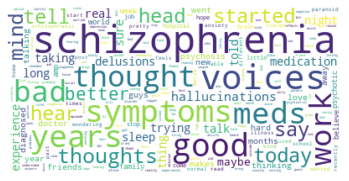

In [244]:
schizophrenia_dict=schizophrenia_sum.to_dict()

# create the WordCloud object
wordcloud = WordCloud(min_word_length =4,
                      background_color='white')

# generate the word cloud
wordcloud.generate_from_frequencies(schizophrenia_dict)

#plot
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# ML STUFF

In [6]:
df

,Title,Text,Subreddit
0,exposure does not work!,I have struggled with social anxiety from chil...,Anxiety
1,Panic attack? derealization? can't go to docto...,"Back in March (I know, a while ago D:), I woke...",Anxiety
2,How long can a panic attack last?!,I've been withdrawing from medicines lately (e...,Anxiety
3,Stepping stones,"First time poster, long time lurker. \n\nI've ...",Anxiety
4,"Coping with anxiety over climate change, on th...","Hi all,\n\nI made a throwaway account as my ma...",Anxiety
...,...,...,...
488467,Religion and paranoid conversation,Ok! I've got a rant to make and a conversation...,schizophrenia
488468,Isn't this a little weird for being tardive dy...,"When I wake up, I rarely have any tics in my t...",schizophrenia
488469,Is this a symptom of schizophrenia or somethin...,I’m not sure if this is schizophrenia (or perh...,schizophrenia
488470,Anyone seen the new Black Mirror episode Bande...,Although I don't think it was stated what Stef...,schizophrenia


In [7]:
X = df["Text"].to_numpy()
Y = df["Subreddit"]


le1 = preprocessing.LabelEncoder()

Y = le1.fit_transform(Y)

trainX, testX, trainY, testY = train_test_split(X, Y, test_size=8000, train_size=2000, random_state=42)

In [8]:
vectorizer = TfidfVectorizer(min_df=3, max_df=0.3, max_features=100, strip_accents="unicode", stop_words=my_stop_words)
trainX = vectorizer.fit_transform(trainX)
testX = vectorizer.transform(testX)

In [9]:
trainX= trainX.toarray()
testX= testX.toarray()
trainX.shape

(2000, 100)

In [10]:
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(trainX, testX, trainY, testY)
models

 90%|█████████████████████████████████████████████████████████████████████████▌        | 26/29 [00:19<00:03,  1.01s/it]

[23:47:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:24<00:00,  1.19it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.37,0.32,None,0.42,0.06
LinearDiscriminantAnalysis,0.58,0.27,None,0.53,0.15
BernoulliNB,0.49,0.27,None,0.50,0.05
LogisticRegression,0.58,0.25,None,0.52,0.20
PassiveAggressiveClassifier,0.48,0.25,None,0.47,0.12
SGDClassifier,0.53,0.25,None,0.50,0.27
Perceptron,0.49,0.24,None,0.47,0.07
LinearSVC,0.60,0.24,None,0.52,2.08
LGBMClassifier,0.58,0.23,None,0.51,1.80


In [ ]:
models

In [29]:
model = RandomForestClassifier(random_state=0)

model.fit(trainX, trainY)

# predict the labels of the training set
predictedY = model.predict(trainX)

# print quality metrics
print('\nTraining Regression Report:') 
print('Mean Squared Error: ', mean_squared_error(trainY, predictedY))
print('Explained Variance ', explained_variance_score(trainY, predictedY))
print('Mean Absolute Error: ', mean_absolute_error(trainY, predictedY))
print('R squared: ', r2_score(trainY, predictedY))
print('\n\n')

# predict the labels of the test set
predictedY = model.predict(testX)

# print quality metrics
print('Testing Regression Report:') 
print('Mean Squared Error: ', mean_squared_error(testY, predictedY))
print('Explained Variance ', explained_variance_score(testY, predictedY))
print('Mean Absolute Error: ', mean_absolute_error(testY, predictedY))
print('R squared: ', r2_score(testY, predictedY))
#print('\nClassification Report:\n\n', classification_report(testY, predictedY))


Training Regression Report:
Mean Squared Error:  0.219
Explained Variance  0.9279200735737424
Mean Absolute Error:  0.075
R squared:  0.9276226323367702



Testing Regression Report:
Mean Squared Error:  2.987625
Explained Variance  0.03913545452037026
Mean Absolute Error:  0.955375
R squared:  0.012740158463858231


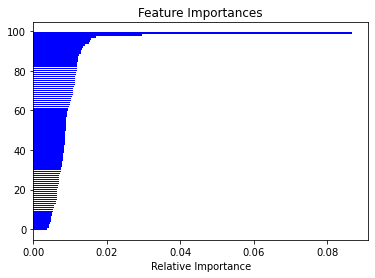

In [30]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.xlabel('Relative Importance')
plt.show()

In [33]:
sorted(importances)

[0.0038042403305199456,
 0.004269227824341507,
 0.0043874553986169304,
 0.0046714775317217416,
 0.0048156370243709135,
 0.0048217097796841,
 0.004898720881534954,
 0.005072990721467211,
 0.005093210477023463,
 0.005238619962609598,
 0.00548895195182128,
 0.005553300222076264,
 0.005595658173662024,
 0.006050179154687504,
 0.006142644911753754,
 0.006327507448973812,
 0.006338755952054029,
 0.00644880301787524,
 0.006471918002617792,
 0.00654169221935701,
 0.006564505724491311,
 0.006624776696494285,
 0.00666554575141992,
 0.006865290566524519,
 0.006896430100843118,
 0.006909930826840819,
 0.006920387228118408,
 0.006921878454598816,
 0.007273341131171044,
 0.007411828136727428,
 0.007441466969658177,
 0.007639652908234401,
 0.007687968954834307,
 0.007841076665736439,
 0.007914409032645372,
 0.00795856069772227,
 0.008024178879063934,
 0.008126521805882754,
 0.00818603914372632,
 0.008224241361749207,
 0.008264211242311838,
 0.008355245456311026,
 0.008428260129765233,
 0.008500831883

In [32]:
testX

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.19583132],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.0607333 , 0.08772789, ..., 0.05999898, 0.04970973,
        0.        ],
       [0.19946604, 0.        , 0.        , ..., 0.        , 0.        ,
        0.1530973 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [34]:
vectorizer.decode(0.08684001885444373)

0.08684001885444373